In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.clasterization import clasterize
from src.fetch_comments import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [3]:
comments = fetch_comments(id='L_Guz73e6fw', max_result=3000, max_len=200)

In [16]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens', 'cohere']

In [17]:
embeddings = embed(model_name=embed_model_names[1], sentences=comments)

embeddings.shape

(3100, 1024)

In [41]:
from collections import Counter

clasters = clasterize(
    method_name='agglomerative', 
    embeddings=embeddings)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')

Claster 3 has 1257 comments
Claster 0 has 507 comments
Claster 4 has 257 comments
Claster 1 has 411 comments
Claster 2 has 668 comments


In [42]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
Sam Altman sounds so well-intentioned, and I think Lex Fridman has a different understanding of the word 'wisdom' than I do. I think that wisdom includes the ability to say something like, "the road t
----------
This interview is GOLD!!!! WOW---Great job Lex!---instantly subscribing.
----------
Sam's take on things is just so well considered and balanced. Much more of this is needed in leadership. If was a "better CEO" like he mentioned, a cheerleader of AI, I'd be very concerned.
----------
One of the most important and interesting interviews you have ever done Lex, this was super insightful of our future to come, hopefully we steer towards the good ending lol.
----------
Delightful to hear two very smart people having an incredibly nuanced conversation.
----------
Claster 1
Triggered🤣
----------
❤
----------
Sams Voice is one hell of a vocal fry
----------
Sam is epitome of vocal fry. So annoying to listen to him.
----------
👍
----------
Claster 2
Re: AI safety. Limiting AI

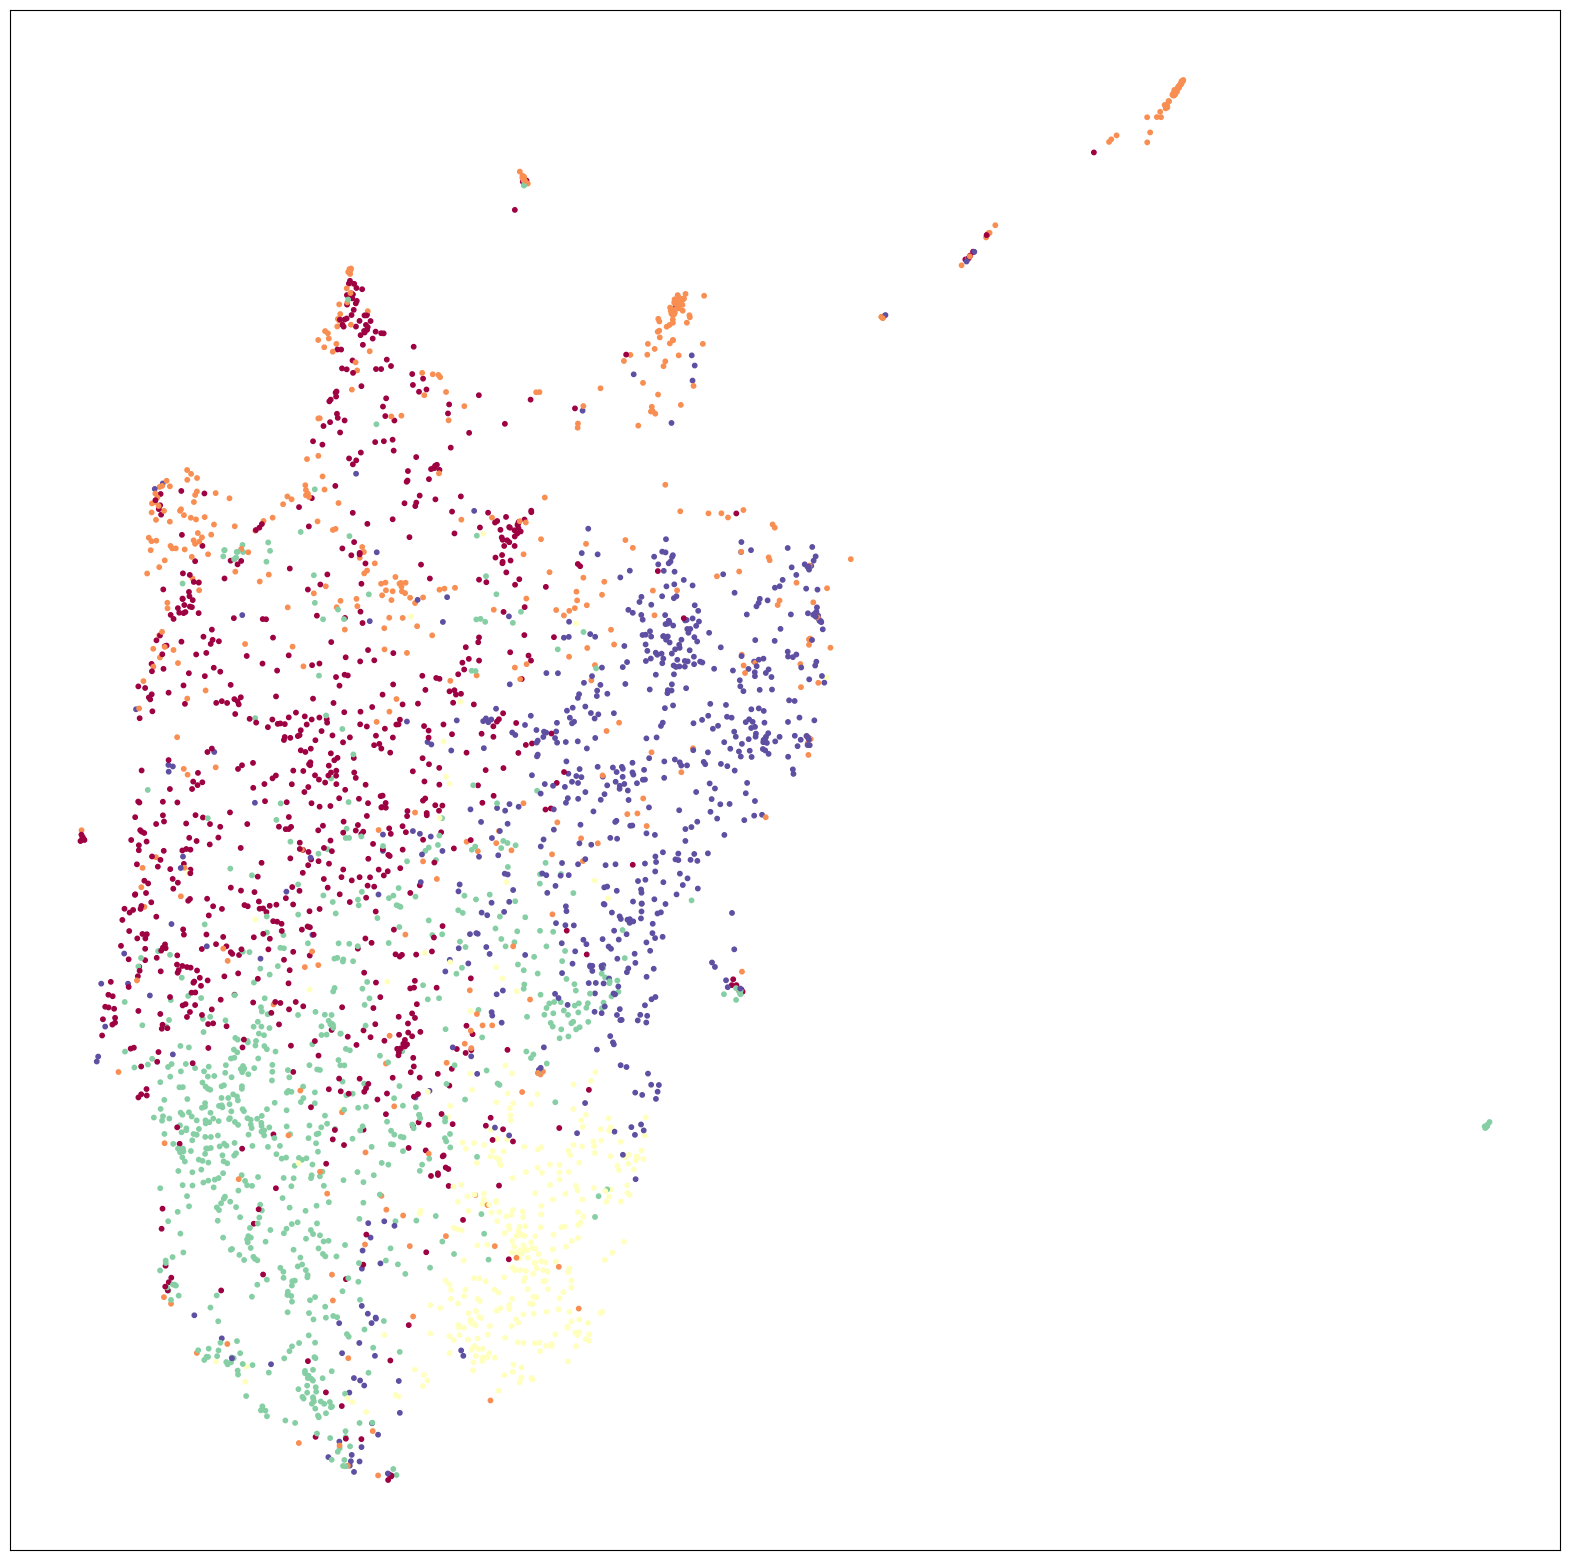

In [26]:
# UMAP visualization
import umap

umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2).fit_transform(embeddings)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clasters, s=10, cmap='Spectral')
plt.xticks([])
plt.yticks([])
plt.show()